# Sunlight data

This script generates a graph of sunrise/sunset throughout the year,
for the 2nd presentation.

In [ ]:
%pip install -r requirements.txt

In [7]:
import datetime as dt

from astral.sun import sun
from astral.geocoder import database, lookup
from astral import LocationInfo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
assert sys.version_info >= (3, 6), "Python version too low."

In [8]:
city = lookup("Sydney", database())

data = []
d = dt.date(2024, 1, 1)

while d.year < 2025:
    s1 = sun(city.observer, date=d, tzinfo='Australia/Sydney')
    s2 = sun(city.observer, date=d, tzinfo='Australia/Brisbane')
    data.append({
        'd': d,
        'sunrise_local': s1['sunrise'],
        'sunset_local': s1['sunset'],
        'sunrise_fixed': s2['sunrise'],
        'sunset_fixed': s2['sunset'],
    })
    d = d + dt.timedelta(days=1)
df = pd.DataFrame(data)

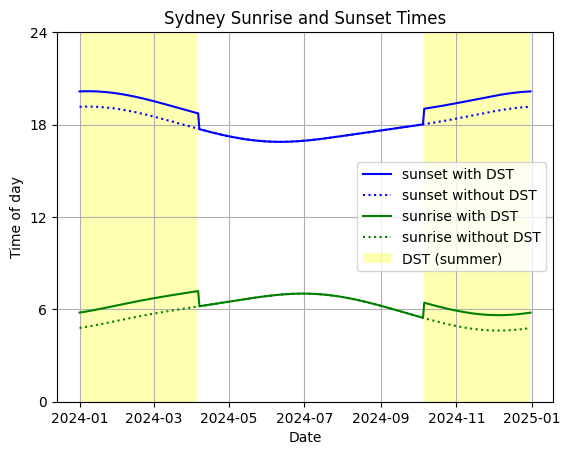

In [9]:
# Plotting
fig, ax = plt.subplots()

# Plot sunrise
for (d,c) in zip(['sunset', 'sunrise'], ['blue', 'green']):
    k = d + '_local'
    y = df[k].dt.hour + df[k].dt.minute  / 60 + df[k].dt.second  / 60**2
    plt.plot(df['d'], y, label=f"{d} with DST", color=c)

    k = d + '_fixed'
    y = df[k].dt.hour + df[k].dt.minute  / 60 + df[k].dt.second  / 60**2
    plt.plot(df['d'], y, linestyle='dotted', label=f"{d} without DST", color=c)

ax.fill_between(df['d'], 0, 24, where=df['sunrise_fixed'].dt.hour != df['sunrise_local'].dt.hour, facecolor='yellow', alpha=.3, label='DST (summer)')


# Beautify the plot
plt.title('Sydney Sunrise and Sunset Times')
plt.xlabel('Date')
plt.ylabel('Time of day')
plt.ylim((0,24))
plt.yticks(range(0,24+1,6))
plt.legend()
plt.grid(True)
plt.savefig('plots/sunrise.png')


In [10]:
df

,d,sunrise_local,sunset_local,sunrise_fixed,sunset_fixed
0,2024-01-01,2024-01-01 05:47:18.020711+11:00,2024-01-01 20:09:04.417387+11:00,2024-01-01 04:47:18.020711+10:00,2024-01-01 19:09:04.417387+10:00
1,2024-01-02,2024-01-02 05:48:02.361994+11:00,2024-01-02 20:09:15.784923+11:00,2024-01-02 04:48:02.361994+10:00,2024-01-02 19:09:15.784923+10:00
2,2024-01-03,2024-01-03 05:48:47.907005+11:00,2024-01-03 20:09:25.318742+11:00,2024-01-03 04:48:47.907005+10:00,2024-01-03 19:09:25.318742+10:00
3,2024-01-04,2024-01-04 05:49:34.609387+11:00,2024-01-04 20:09:33.006237+11:00,2024-01-04 04:49:34.609387+10:00,2024-01-04 19:09:33.006237+10:00
4,2024-01-05,2024-01-05 05:50:22.422088+11:00,2024-01-05 20:09:38.836680+11:00,2024-01-05 04:50:22.422088+10:00,2024-01-05 19:09:38.836680+10:00
...,...,...,...,...,...
361,2024-12-27,2024-12-27 05:44:24.189090+11:00,2024-12-27 20:07:56.025193+11:00,2024-12-27 04:44:24.189090+10:00,2024-12-27 19:07:56.025193+10:00
362,2024-12-28,2024-12-28 05:45:02.929989+11:00,2024-12-28 20:08:14.985769+11:00,2024-12-28 04:45:02.929989+10:00,2024-12-28 19:08:14.985769+10:00
363,2024-12-29,2024-12-29 05:45:43.061312+11:00,2024-12-29 20:08:32.187170+11:00,2024-12-29 04:45:43.061312+10:00,2024-12-29 19:08:32.187170+10:00
364,2024-12-30,2024-12-30 05:46:24.540739+11:00,2024-12-30 20:08:47.608784+11:00,2024-12-30 04:46:24.540739+10:00,2024-12-30 19:08:47.608784+10:00
